## Homework:

Highly nonlinear oscillator: 

Recall the numerical solution for oscillations of a spring with power p = 12 (use F=-0.01\*y[0]\**11). Decompose the solution into a Fourier series and determine the number of higher harmonics that contribute at least 10%; for example, determine the n for which |bn /b1 | < 0.1. Check that resuming the components reproduces the signal.
(Landau 289)

Warning: please only sample the data within one period

Landau, Rubin H., Manuel Páez, Cristian Bordeianu. Computational Physics: Problem Solving with Python, 3rd Edition. Wiley-Blackwell, 2015-07-15. VitalBook file.

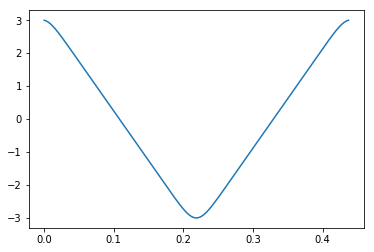

In [1]:
# Let's first try linear force  Fx=-0.01*x

""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# rk4.py 4th order Runge Kutta
		 
%matplotlib inline
import matplotlib.pylab as p
import numpy as np

#   Initialization
a = 0.0
b = 0.43725
n = 1000                                         
ydumb = np.zeros((2), float);    y = np.zeros((2), float)
fReturn = np.zeros((2), float);  k1 = np.zeros((2), float)
k2 = np.zeros((2), float);       k3 = np.zeros((2), float) 
k4 = np.zeros((2), float)
y[0] = 3.;   y[1] = -5.
t = a;       h = (b-a)/n;
xp=np.array([0.0])
yp=np.array([y[0]])

def f( t, y):                                           # Force function 
    fReturn[0] = y[1]                                            
    fReturn[1] = -0.01*y[0]**11      
    return fReturn

def rk4(t,h,n):                 
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y)                                            # Returns RHS's  
    for i in range(0, n):
       k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, 2):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y    

while (t < b):                                              # Time loop
    if ((t + h) > b):
        h = b - t                                           # Last step
    y = rk4(t,h,2)
    t = t + h
    xp=np.append(xp, t)
    yp=np.append(yp,y[0])
    
p.plot(xp,yp)
p.show()

The Coefficents are determined by integrating the fourier series cos and sin with the function over the time period, which is about 0.435 for the given force and initial conditions. I'll do a simple riemann sum and show that this gives an accurate result.

In [2]:
yp

array([3.        , 2.99764488, 2.99495402, ..., 2.99475123, 2.9974657 ,
       2.99984465])

In [3]:
T = (b-a)
dx = (b-a)/n
def an(n):
   a = yp*np.cos(2*n*np.pi*xp/T)
   return a.sum()*2*dx/(T)

def bn(n):
   b = yp*np.sin(2*n*np.pi*xp/T)
   return b.sum()*2*dx/(T)



Looking at the coefficents for the sin and cos series from 1 to 10, we see that it is mostly concentrated at the low frequency 

In [4]:
[an(i) for i in range(1,10)]

[2.6327328953825835,
 0.013102111919128506,
 0.25990559007916275,
 0.012043180873216713,
 0.07641267984330037,
 0.010719667529545007,
 0.031392474961230765,
 0.009483268611536512,
 0.01647540735052633]

In [5]:
[bn(i) for i in range(1,10)]

[0.0005831870897964677,
 3.1533144137938507e-06,
 0.00016911555080656627,
 5.365782475337255e-06,
 7.816371463266593e-05,
 6.285481885072386e-06,
 3.946146831299302e-05,
 6.184553514515301e-06,
 2.0929165323920527e-05]

The cosine series is mostly concenrated on n = 1 juding by how all the higher frequencies contains less than 10 percent

In [6]:
[an(n)/an(1) for n in range(2,10)]

[0.004976620280054856,
 0.09872083511965758,
 0.004574402855047938,
 0.029024091269310565,
 0.004071688224941348,
 0.011923911846996873,
 0.0036020625670643365,
 0.006257910697823433]

The sin series n = 3 and n = 5 contains more than percent of the n = 1 coefficent, while the rest is neglibile

In [7]:
[bn(n)/bn(1) for n in range(2,10)]

[0.005407037413832939,
 0.28998507299876547,
 0.009200790911214982,
 0.1340285407551547,
 0.010777813835464053,
 0.06766519527509615,
 0.010604750384089796,
 0.035887566254638466]

We can check that the coeffficents are good by seeing if the resultant fourier series matches up with the original function

In [8]:
def f(n):
    a = np.array([an(i)*np.cos(2*i*np.pi*xp/T) for i in range(1,n)]).sum(axis = 0)
    b = np.array([bn(i)*np.sin(2*i*np.pi*xp/T) for i in range(1,n)]).sum(axis = 0)
    a0 = yp.sum()*dx/T
    return a0 + a + b

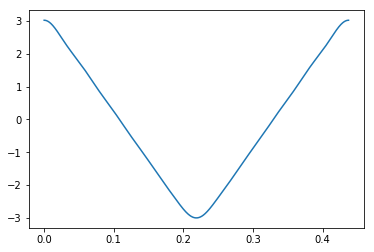

In [9]:
p.plot(xp,f(10))

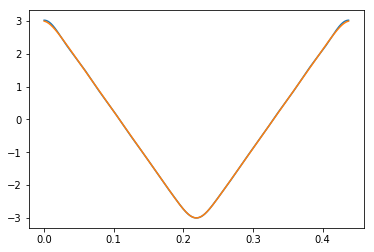

In [10]:
p.plot(xp,f(10))
p.plot(xp,yp)

They match up almost perfectly!